# Capstone: Predicting Airbnb Prices - EDA

### About the project:

The main problem/question this project wants to address is the prices of Airbnb listings in Auckland, how we can predict them to ensure competitive prices and if any factors impact the price hugely. 

Airbnb is an internet marketplace for short-term home and apartment rentals that allows you to rent out a home for a week while you’re away, or rent out a spare bedroom to travellers. Some people use Airbnb as their main source of income and own properties that they are renting out throughout the year.
The company itself has grown rapidly from its founding in 2008 to a valuation near US$40 billion and is currently worth more than any hotel chain in the world.

One challenge that Airbnb hosts face is determining the optimal nightly rent price. In many areas, would-be renters are presented with a good selection of listings and can filter by criteria like price, number of bedrooms, room type, and more. Since Airbnb is a marketplace, the amount a host can charge on a nightly basis is closely linked to the dynamics of the marketplace. 

Deloitte Access Economics’ landmark report from 2018 (Economic effects of Airbnb in New Zealand), found Airbnb guests 2017 spent more than 781 million dollars in New Zealand. 
That contributed to around 600 million dollars to the economy and supported more than 6,000 local jobs




### Business and Data Question:

Business value for hosts?
- Which areas are more likely to have good prices?
- How to establish competitive prices?

How can it be answered with data?
- How does the price differ across Auckland?
- What kind of property is most popular?
- Can we predict/recommend in which price range should hosts put their property?

Possible stakeholders are Auckland Airbnb hosts that want to know what is the best price they can get for their listing, how to be competitive, if there are  specific features that are important in being a successful host and if there are areas that are getting better prices.


### About the Data

Data is downloaded from Inside Airbnb (http://insideairbnb.com). As per their website, they are a mission-driven project that provides data and advocacy about Airbnb's impact on residential communities and they work towards a vision where data and information empower communities to understand, decide and control the role of renting residential homes to tourists.
Quarterly data for the last year for each region is available for free download on the page, and for monthly or archived data it is possible to make an archived data request.

The file used for the project is listings.csv - detailed listings data and it has 39935 rows and 80 columns. A data dictionary is available on the link - http://shorturl.at/bdlwF .  To ensure it is available in future, it is copied into a report. 


- data from http://insideairbnb.com

 - How does price differ across  Auckland
 - What kind of property is most popular 
 - Can we predict/recommend in which price range should hosts put their property?


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import missingno

### Loading Data

In [2]:
listings  = pd.read_csv(R'/Users/martahuhoja/Documents/IOD/Capstone/Airbnb/listings.csv')

In [3]:
pd.options.display.max_columns=100

In [4]:
listings

id                                      listing_url  \
0                    6113                https://www.airbnb.com/rooms/6113   
1                   46071               https://www.airbnb.com/rooms/46071   
2                   48443               https://www.airbnb.com/rooms/48443   
3                   48445               https://www.airbnb.com/rooms/48445   
4                   49823               https://www.airbnb.com/rooms/49823   
...                   ...                                              ...   
39930  755098140734048382  https://www.airbnb.com/rooms/755098140734048382   
39931  755212798613722951  https://www.airbnb.com/rooms/755212798613722951   
39932  755212800697292471  https://www.airbnb.com/rooms/755212800697292471   
39933  755303927455413418  https://www.airbnb.com/rooms/755303927455413418   
39934  755378155204729870  https://www.airbnb.com/rooms/755378155204729870   

            scrape_id last_searched last_scraped  \
0      20221108182706           NaN   2022-11-09   
1      20221108182706    2022-11-08   2022-11-09   
2      20221108182706           NaN   2022-11-09   
3      20221108182706           NaN   2022-11-09   
4      20221108182706    2022-11-08   2022-11-09   
...               ...           ...          ...   
39930  20221108182706    2022-11-08   2022-11-09   
39931  20221108182706    2022-11-08   2022-11-09   
39932  20221108182706    2022-11-08   2022-11-09   
39933  20221108182706    2022-11-08   2022-11-09   
39934  20221108182706    2022-11-08   2022-11-09   

                                              name  \
0                                    Queen Bedroom   
1                                           Kamahi   
2                               room for the night   
3                               room for the night   
4                                      Residential   
...                                            ...   
39930          Surf’scape - Whitianga Holiday Home   
39931    Picture Perfect - Queenstown Holiday Home   
39932  Arkles Bay Nest - Stanmore Bay Holiday Home   
39933                      Woodlands Close Retreat   
39934                        Oneroa Garden Retreat   

                                             description  \
0      <b>The space</b><br />Large Queen bedroom with...   
1      Relax, look out at the lake and listen to the ...   
2      <b>The space</b><br />we live on a lifestyle b...   
3      <b>The space</b><br />we live on a lifestyle b...   
4      <b>The space</b><br />Located in a quite stree...   
...                                                  ...   
39930                                                NaN   
39931                                                NaN   
39932                                                NaN   
39933  - Three bedroom, two bathroom home in Goldfiel...   
39934  Oneroa Garden Retreat is an immaculately prese...   

      neighborhood_overview  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                       NaN   
...                     ...   
39930                   NaN   
39931                   NaN   
39932                   NaN   
39933                   NaN   
39934                   NaN   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/17172/2e1fa57...      12177   
1      https://a0.muscache.com/pictures/d3723155-227c...     202747   
2      https://a0.muscache.com/pictures/278117/e4f3ba...     220702   
3      https://a0.muscache.com/pictures/278118/ac3991...     220702   
4      https://a0.muscache.com/pictures/285931/bc4710...     227760   
...                                                  ...        ...   
39930  https://a0.muscache.com/pictures/prohost-api/H...  145244100   
39931  https://a0.muscache.com/pictures/prohost-api/H...  145244100   
39932  https://a0.muscache.com/pictures/prohost-api/H...  145244100   
39933  h

## Auckland data 

In [5]:
#to load Auckland data, region_parent_id is specified
#number of reviews is set to >0 to ensure listings had at least one review

data = listings.loc[(listings["region_parent_id"] == 76) & (listings["number_of_reviews"] > 0)]
data

id                                      listing_url  \
18                 119431              https://www.airbnb.com/rooms/119431   
26                 147996              https://www.airbnb.com/rooms/147996   
27                 154119              https://www.airbnb.com/rooms/154119   
28                 154130              https://www.airbnb.com/rooms/154130   
30                 171321              https://www.airbnb.com/rooms/171321   
...                   ...                                              ...   
39705  750799279512337008  https://www.airbnb.com/rooms/750799279512337008   
39719  750986727197116700  https://www.airbnb.com/rooms/750986727197116700   
39746  751579355490586247  https://www.airbnb.com/rooms/751579355490586247   
39796  752432468822072687  https://www.airbnb.com/rooms/752432468822072687   
39836  753694431140378695  https://www.airbnb.com/rooms/753694431140378695   

            scrape_id last_searched last_scraped  \
18     20221108182706    2022-11-08   2022-11-09   
26     20221108182706    2022-11-08   2022-11-09   
27     20221108182706    2022-11-08   2022-11-09   
28     20221108182706    2022-11-08   2022-11-09   
30     20221108182706    2022-11-08   2022-11-09   
...               ...           ...          ...   
39705  20221108182706    2022-11-08   2022-11-09   
39719  20221108182706    2022-11-08   2022-11-09   
39746  20221108182706    2022-11-08   2022-11-09   
39796  20221108182706    2022-11-08   2022-11-09   
39836  20221108182706    2022-11-08   2022-11-09   

                                                   name  \
18                      A place in the Country for YOU!   
26                  Clean & comfy, 'home away from home   
27                       Room in a Home, Away from Home   
28                   Waterfront Paradise, Awesome Views   
30                               Living Made Affordable   
...                                                 ...   
39705       Stylish Apartment in the Heart of the City!   
39719                Great Location and lookouts around   
39746  Brand new, luxury stand alone unit by the beach!   
39796       1 Bed location close to city for 1/2 people   
39836   Auckland中区mt Eden两房独立卫浴Villa house泳池豪华别墅可爱小猫大房间   

                                             description  \
18     We are the ideal stop off after flying into th...   
26     If you are just going to 'blob out' and be at ...   
27     This is a modern 5 bedroom two level family ho...   
28     Our place is the best of two worlds, offering ...   
30     <b>The space</b><br />Known as the City of Sai...   
...                                                  ...   
39705  Stylish one bedroom in a brand new Auckland CB...   
39719  Warm light filled home down a quiet driveway w...   
39746  Kick back & relax in this calm, stylish space....   
39796  Hi I am Jason (host)- i've travelled the world...   
39836  独立卫浴两房 适合一家人或者朋友结伴出行居住<br />近mt Eden山和mt Eden ...   

                                   neighborhood_overview  \
18     What neighbourhood? We have one other house on...   
26     Very safe location and takes me 18 minutes to ...   
27     The suburb in general is a fairly new developm...   
28     A large lawn and garden, lead to expansive bea...   
30                                                   NaN   
...                                                  ...   
39705  Everything you need is within walking distance...   
39719  Domain at the base of Onewa Road, alongside th...   
39746                                                NaN   
39796                                                NaN   
39836                                        无尾静街，友善洋人邻居   

                                             picture_url    host_id  \
18     https://a0.muscache.com/pictures/776854/72fac5...     603014   
26     https://a0.muscache.com/pictures/985472/b55f5b...     669085   
27     https://a0.muscache.com/pictures/1014833/9f859...     741305   
28     https://a0.muscache

In [6]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_searched', 'last_scraped',
       'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_

In [7]:
pd.options.display.max_rows=210

### Checking for missing values

In [8]:
data.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_searched                                   1232
last_scraped                                       0
name                                               0
description                                       58
neighborhood_overview                           1880
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                    910
host_about                                      2607
host_response_time                              1167
host_response_rate                              1167
host_acceptance_rate                             872
host_is_superhost                             

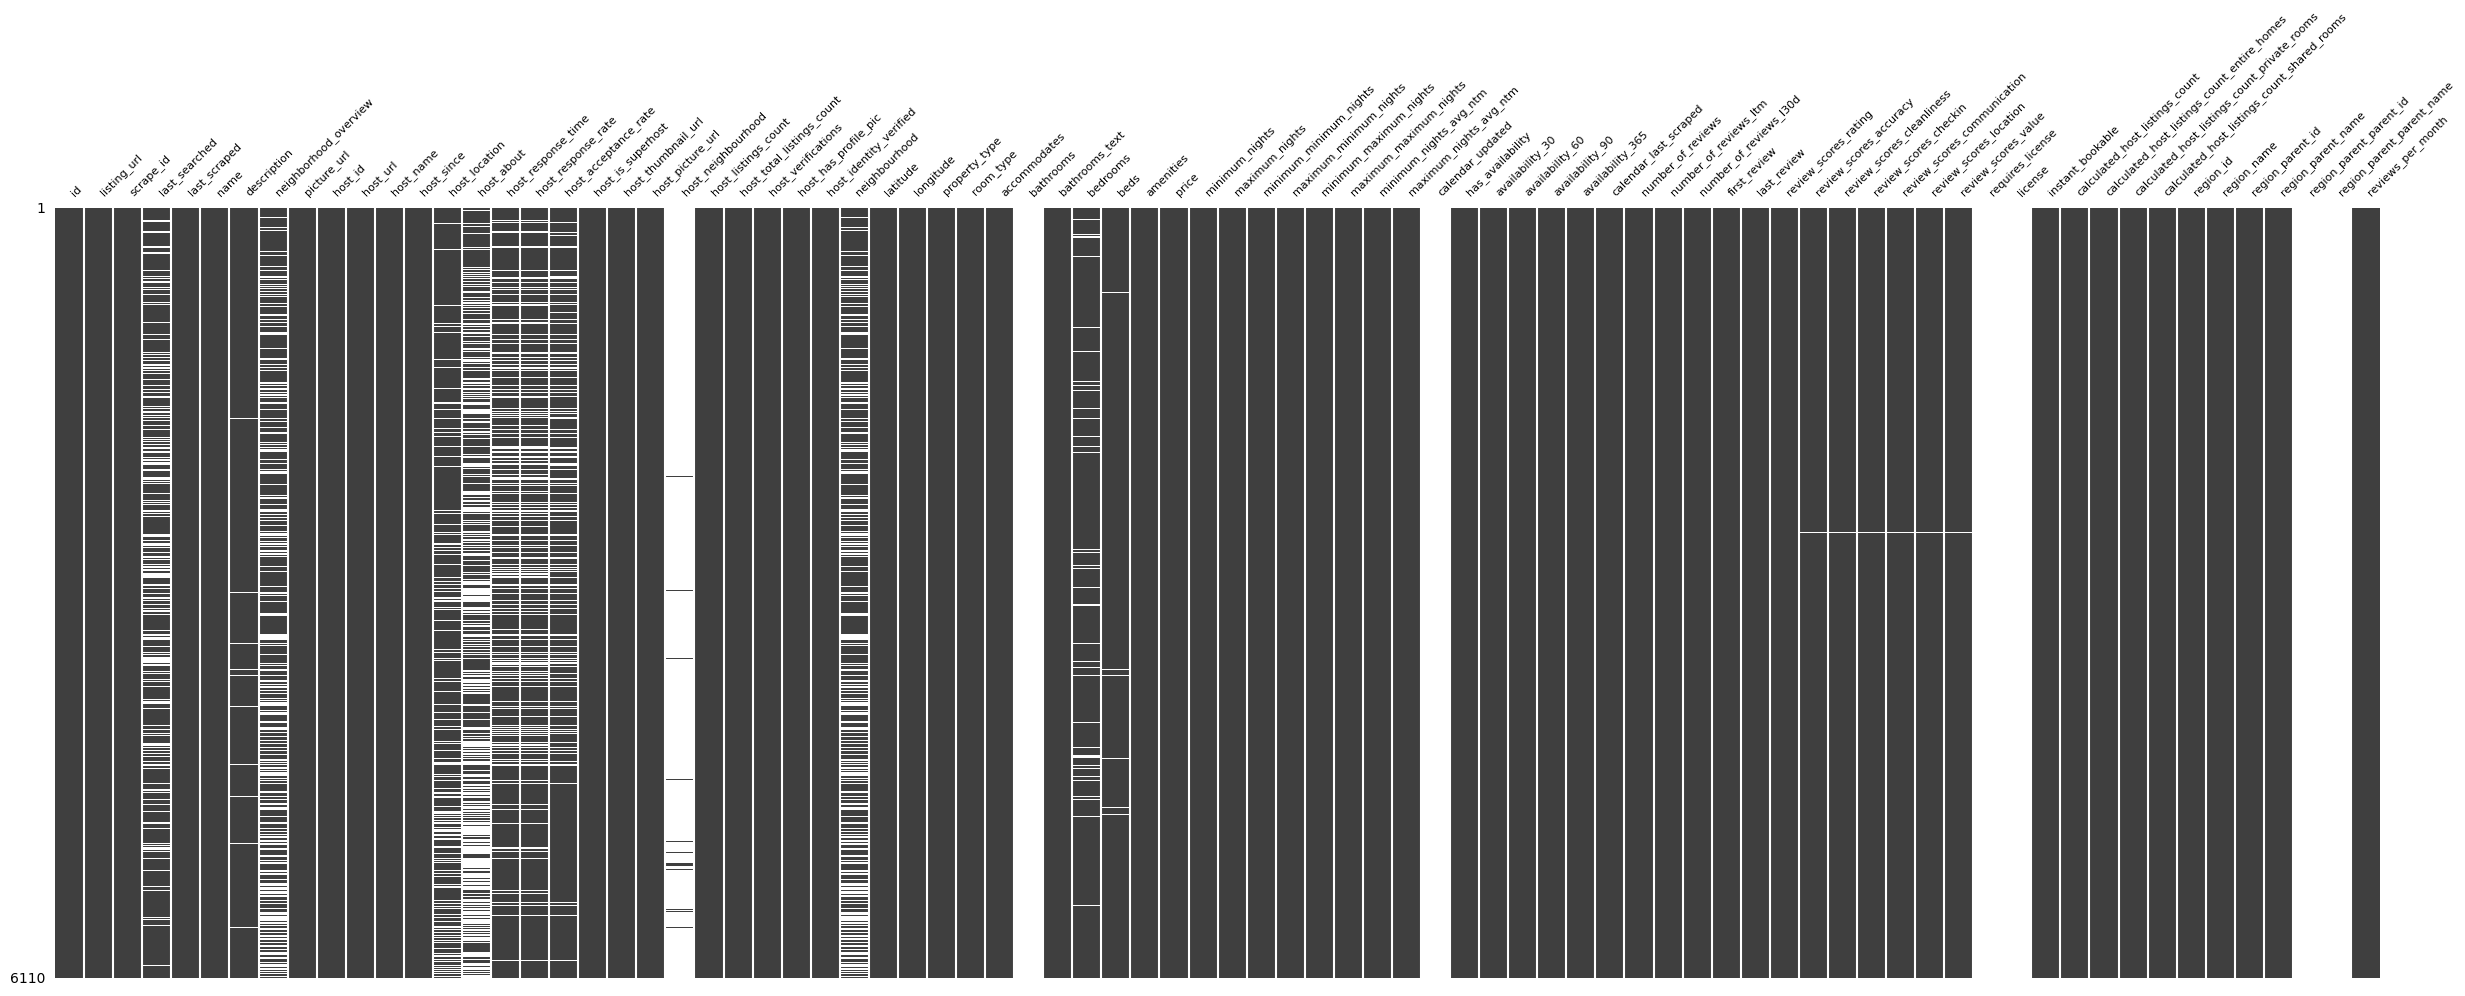

In [15]:
#visualising missing values with missingno library

missingno.matrix(data,figsize=(30,10), fontsize=8, sparkline=False, labels=list(data.columns));

In [16]:
#dropping columns wtih large number of missing values and one that are upfront known as without added value for model 

data = data.drop(columns=[
    'last_searched',
    'description',
    'neighborhood_overview',
    'picture_url',
    'host_about', 
    'host_neighbourhood', 
    'bathrooms', 
    'calendar_updated', 
    'requires_license', 
    'license', 
    'region_parent_parent_id', 
    'region_parent_parent_name',
    'host_thumbnail_url',  
    'host_picture_url',
    'host_neighbourhood',
    'host_total_listings_count',
    'calculated_host_listings_count',                  
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',   
    'calculated_host_listings_count_shared_rooms',
    'host_total_listings_count',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'minimum_minimum_nights', 
    'maximum_minimum_nights', 
    'minimum_maximum_nights', 
    'maximum_maximum_nights', 
    'calendar_last_scraped'
    ])

In [17]:
#removing listings that don't have any availability in the next 365 days and don't have any reviews in the past month
#they are possibly inactive

not_active = data.loc[(data['availability_365']==0) & (data['number_of_reviews_ltm']==0) ]
not_active.shape

(900, 54)

In [18]:
data = data.drop(not_active.index)

In [19]:
data.isna().sum()

id                                0
listing_url                       0
scrape_id                         0
last_scraped                      0
name                              0
host_id                           0
host_url                          0
host_name                         0
host_since                        0
host_location                   775
host_response_time              474
host_response_rate              474
host_acceptance_rate            269
host_is_superhost                 1
host_listings_count               0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                  1603
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    2
bedrooms                        256
beds                             48
amenities                   

### Ensuring that all the neighbourhoods are in Auckland

In [20]:
data.neighbourhood.value_counts().sort_values()

Port Albert, Auckland, New Zealand                          1
Rocky Bay, Waiheke Island, New Zealand                      1
Snells Beach, Matakana, New Zealand                         1
Huia, Auckland, New Zealand                                 1
Matakana Village, Matakana, New Zealand                     1
Auckland, Warkworth, New Zealand                            1
Matakana Village, Auckland, New Zealand                     1
Lucas Heights, 奥克兰, New Zealand                             1
Coatesville, Auckland, New Zealand                          1
Mathesons Bay, Auckland, New Zealand                        1
Bayview, 奥克兰, New Zealand                                   1
Auckland City, Auckland, New Zealand                        1
Okura Bush, Auckland, New Zealand                           1
Orere Point, Auckland, New Zealand                          1
Herne Bay, Auckland, Herne Bay, New Zealand                 1
Remuera, Auckland, New Zealand                              1
Big Omah

In [21]:
#dropping rows with location outside Auckland 

data = data[~data['neighbourhood'].isin([
    'Te Arai, Northland, New Zealand', 
    'Mangawhai, Northland, New Zealand',
    'Mangawhai, Wellsford, New Zealand', 
    'Mount Maunganui, New Zealand'])]

In [22]:
#dropping rows with null values 

data = data[data[["host_response_time", 
                  "host_acceptance_rate", 
                  "review_scores_accuracy"]].notnull().all(axis=1)]

In [23]:
# passing boolean t/f values into binary

data.loc[data['host_is_superhost'] == 'f', 'host_is_superhost'] = 0
data.loc[data['host_is_superhost'] == 't', 'host_is_superhost'] = 1

data.loc[data['host_has_profile_pic'] == 'f', 'host_has_profile_pic'] = 0
data.loc[data['host_has_profile_pic'] == 't', 'host_has_profile_pic'] = 1

data.loc[data['host_identity_verified'] == 'f', 'host_identity_verified'] = 0
data.loc[data['host_identity_verified'] == 't', 'host_identity_verified'] = 1

data.loc[data['has_availability'] == 'f', 'has_availability'] = 0
data.loc[data['has_availability'] == 't', 'has_availability'] = 1

data.loc[data['instant_bookable'] == 'f', 'instant_bookable'] = 0
data.loc[data['instant_bookable'] == 't', 'instant_bookable'] = 1

In [24]:
#extracting numbers out of string values 

data['price'] = data['price'].str.extract('(\d+)').astype(float)
data['bathrooms_text'] = data['bathrooms_text'].str.extract('(\d+)').astype(float)
data['host_response_rate']=data['host_response_rate'].str.extract('(\d+)').astype(float)
data['host_acceptance_rate']=data['host_acceptance_rate'].str.extract('(\d+)').astype(float)

In [25]:
#filling missing data

data['neighbourhood'] = data['neighbourhood'].fillna('Auckland')

data['host_location']=data['host_location'].fillna('New Zealand')

data['host_is_superhost'].fillna(data['host_is_superhost'].median(), inplace=True)

data['bathrooms_text'].fillna(data['bathrooms_text'].median(), inplace=True)
data['beds'].fillna(data['beds'].median(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)

In [26]:
#removing listings where number of bathrooms is 0 and price is below $20

data = data.loc[(data[data.bathrooms_text != 0]) and (data[data.price >20])]

In [28]:
data.isna().sum()

id                             0
listing_url                    0
scrape_id                      0
last_scraped                   0
name                           0
host_id                        0
host_url                       0
host_name                      0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_ni

In [29]:
data.shape

(4544, 54)

In [30]:
data.dtypes

id                               int64
listing_url                     object
scrape_id                        int64
last_scraped                    object
name                            object
host_id                          int64
host_url                        object
host_name                       object
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_listings_count              int64
host_verifications              object
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms_text                 float64
bedrooms                 

### Dealing with data types

In [31]:

data['host_is_superhost'] = pd.to_numeric(data['host_is_superhost'])
data['host_has_profile_pic'] = pd.to_numeric(data['host_has_profile_pic'])
data['host_identity_verified'] = pd.to_numeric(data['host_identity_verified'])
data['has_availability'] = pd.to_numeric(data['has_availability'])
data['instant_bookable'] = pd.to_numeric(data['instant_bookable'])
                             

In [32]:
data['host_since'] = pd.to_datetime(data['host_since'])
data['first_review'] = pd.to_datetime(data['first_review'])
data['last_review'] = pd.to_datetime(data['last_review'])

In [33]:
data

id                                      listing_url  \
18                 119431              https://www.airbnb.com/rooms/119431   
27                 154119              https://www.airbnb.com/rooms/154119   
28                 154130              https://www.airbnb.com/rooms/154130   
33                 216802              https://www.airbnb.com/rooms/216802   
34                 216846              https://www.airbnb.com/rooms/216846   
...                   ...                                              ...   
39705  750799279512337008  https://www.airbnb.com/rooms/750799279512337008   
39719  750986727197116700  https://www.airbnb.com/rooms/750986727197116700   
39746  751579355490586247  https://www.airbnb.com/rooms/751579355490586247   
39796  752432468822072687  https://www.airbnb.com/rooms/752432468822072687   
39836  753694431140378695  https://www.airbnb.com/rooms/753694431140378695   

            scrape_id last_scraped  \
18     20221108182706   2022-11-09   
27     20221108182706   2022-11-09   
28     20221108182706   2022-11-09   
33     20221108182706   2022-11-09   
34     20221108182706   2022-11-09   
...               ...          ...   
39705  20221108182706   2022-11-09   
39719  20221108182706   2022-11-09   
39746  20221108182706   2022-11-09   
39796  20221108182706   2022-11-09   
39836  20221108182706   2022-11-09   

                                                   name    host_id  \
18                      A place in the Country for YOU!     603014   
27                       Room in a Home, Away from Home     741305   
28                   Waterfront Paradise, Awesome Views     543866   
33                      Haven In The City - Double Room    1119253   
34                                Haven in The City  #1    1119253   
...                                                 ...        ...   
39705       Stylish Apartment in the Heart of the City!   88294259   
39719                Great Location and lookouts around  139820827   
39746  Brand new, luxury stand alone unit by the beach!    9392775   
39796       1 Bed location close to city for 1/2 people  104726417   
39836   Auckland中区mt Eden两房独立卫浴Villa house泳池豪华别墅可爱小猫大房间  214570881   

                                          host_url        host_name  \
18        https://www.airbnb.com/users/show/603014             Mark   
27        https://www.airbnb.com/users/show/741305           Sunder   
28        https://www.airbnb.com/users/show/543866  Gerry Jeannette   
33       https://www.airbnb.com/users/show/1119253             Judy   
34       https://www.airbnb.com/users/show/1119253             Judy   
...                                            ...              ...   
39705   https://www.airbnb.com/users/show/88294259           Stefan   
39719  https://www.airbnb.com/users/show/139820827           Carlos   
39746    https://www.airbnb.com/users/show/9392775           Nicole   
39796  https://www.airbnb.com/users/show/104726417            Jason   
39836  https://www.airbnb.com/users/show/214570881            Cindy   

      host_since           host_location  host_response_time  \
18    2011-05-19  Wellsford, New Zealand      within an hour   
27    2011-06-25   Auckland, New Zealand        within a day   
28    2011-04-29   Auckland, New Zealand      within an hour   
33    2011-09-06   Auckland, New Zealand  within a few hours   
34    2011-09-06   Auckland, New Zealand  within a few hours   
...          ...                     ...                 ...   
39705 2016-08-06   Auckland, New Zealand      within an hour   
39719 2017-07-11   Auckland, New Zealand      within an hour   
39746 2013-10-13   Auckland, New Zealand      within an hour   
39796 2016-11-22   Auckland, New Zealand      within an hour   
39836 2018-09-10   Auckland, New Zealand      within an hour   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
18                   90.0                  83.0                  0   
27                  100.0 

In [34]:
data.dtypes

id                                      int64
listing_url                            object
scrape_id                               int64
last_scraped                           object
name                                   object
host_id                                 int64
host_url                               object
host_name                              object
host_since                     datetime64[ns]
host_location                          object
host_response_time                     object
host_response_rate                    float64
host_acceptance_rate                  float64
host_is_superhost                       int64
host_listings_count                     int64
host_verifications                     object
host_has_profile_pic                    int64
host_identity_verified                  int64
neighbourhood                          object
latitude                              float64
longitude                             float64
property_type                     

# Host details

In [35]:
data['host_id'].nunique()

2954

In [36]:
data['host_id'].value_counts()

145244100    78
88294259     77
13238000     52
258845734    52
8690246      50
             ..
17693521      1
67083711      1
133642        1
176913765     1
104726417     1
Name: host_id, Length: 2954, dtype: int64

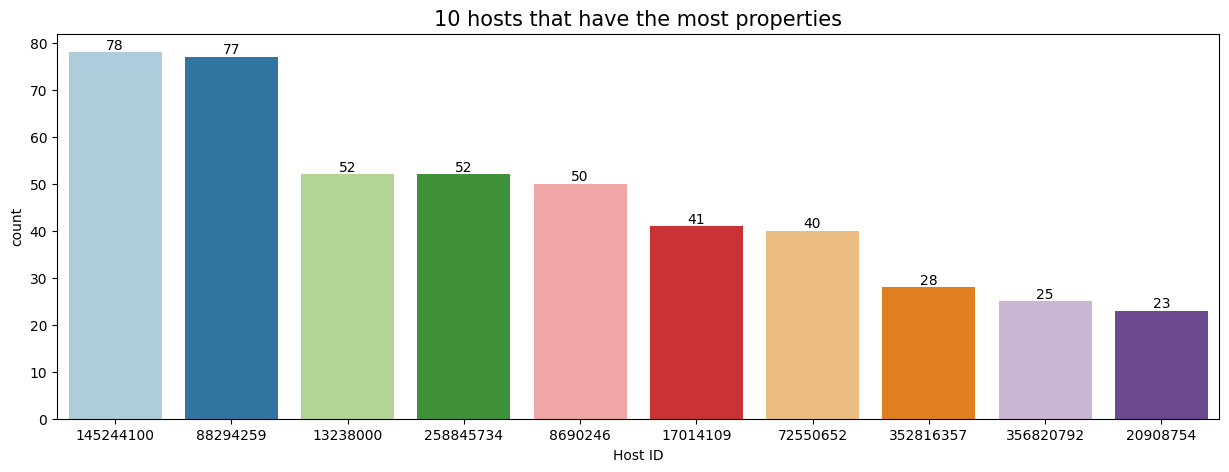

In [37]:
top_10_hosts = data['host_id'].value_counts().nlargest(10)
top_10_data = data[data['host_id'].isin(top_10_hosts.index)]
plt.figure(figsize=(15,5))
ax = sns.countplot(x='host_id', data=top_10_data, order=top_10_data['host_id'].value_counts().index, palette='Paired')
plt.title('10 hosts that have the most properties', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Host ID');

There are 2954 unique host ids. Top 10 hosts with the most properties in Auckland all have more than 20 listings. 

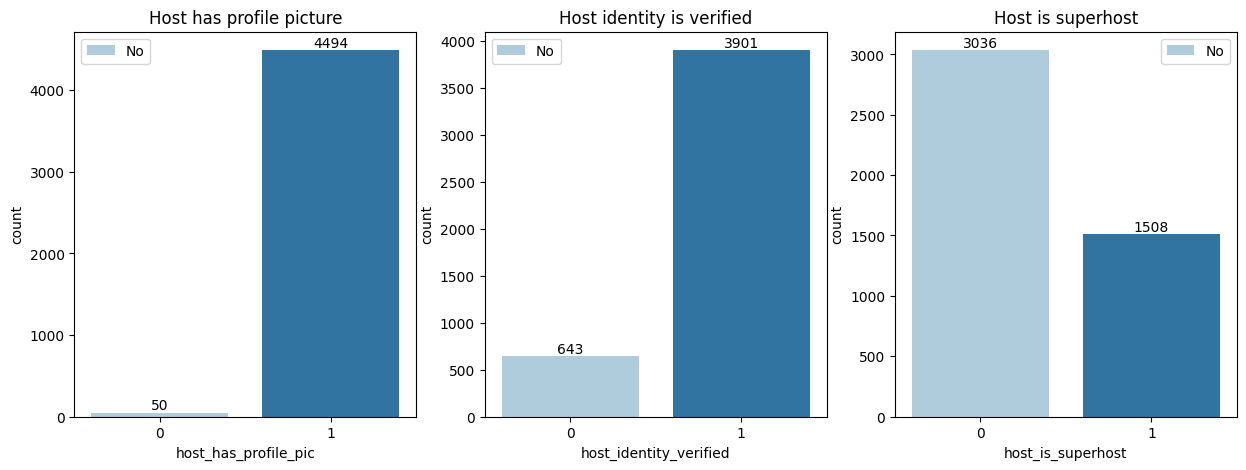

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
ax1 = sns.countplot(x='host_has_profile_pic', data=data, palette='Paired')
plt.title('Host has profile picture')
ax1.bar_label(ax1.containers[0])
plt.legend(['No', 'Yes'])

plt.subplot(1,3,2)
ax2 = sns.countplot(x='host_identity_verified', data=data, palette='Paired')
plt.title('Host identity is verified')
ax2.bar_label(ax2.containers[0])
plt.legend(['No', 'Yes'])
              
plt.subplot(1,3,3)
ax3 = sns.countplot(x='host_is_superhost', data=data, palette='Paired')
plt.title('Host is superhost')
ax3.bar_label(ax3.containers[0])
plt.legend(['No', 'Yes']);

Most of the hosts have their identity verified and profile picture. 1/3 of hosts are superhosts. 
Superhost is a host that has: 
 - 4.8+ overall rating
 - 10+ stays
 - <1% cancellation rate
 - 90% response rate
 
They have access to more visibility, earning potential and exclusive rewards.

In [40]:
data.host_response_time.unique()

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [41]:
data['host_response_time'].value_counts()

within an hour        3346
within a few hours     735
within a day           388
a few days or more      75
Name: host_response_time, dtype: int64

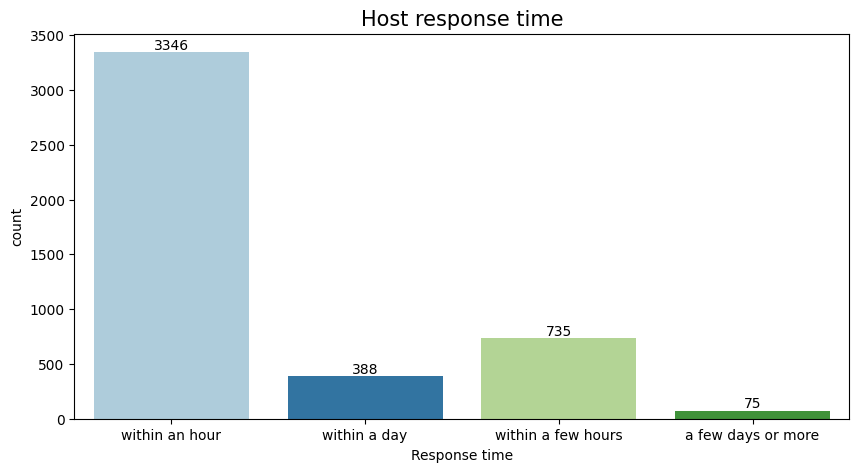

In [42]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='host_response_time', data=data, palette='Paired')
plt.title('Host response time', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Response time');

Most hosts response within an hour. 

<Figure size 600x800 with 0 Axes>

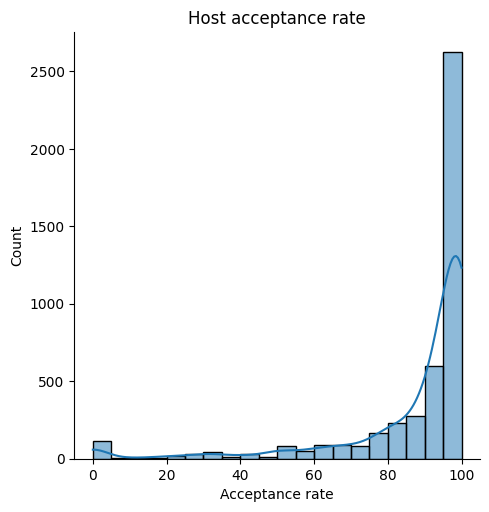

In [43]:
plt.figure(figsize=(6,8))
sns.displot(data['host_acceptance_rate'].dropna(), kde=True, bins=20)
plt.title('Host acceptance rate')
plt.xlabel('Acceptance rate');


<Figure size 600x800 with 0 Axes>

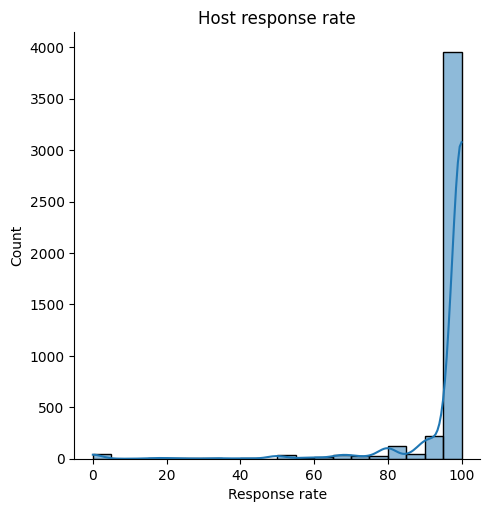

In [44]:
plt.figure(figsize=(6,8))
sns.displot(data['host_response_rate'].dropna(), kde=True, bins=20)
plt.title('Host response rate')
plt.xlabel('Response rate');


Host acceptance rate and response rate are highly left skewed.

In [45]:
print(f"Of the Airbnb hosts in this Auckland dataset, the first joined on {min(data.host_since).strftime('%d %B %Y')}, and the most recent joined {max(data.host_since).strftime('%d %B %Y')}")


Of the Airbnb hosts in this Auckland dataset, the first joined on 21 September 2009, and the most recent joined 28 October 2022


In [46]:
print(f"Of the Airbnb hosts in this Auckland dataset, the first review was received on {min(data.first_review).strftime('%d %B %Y')}, and the most recent first review was on {max(data.first_review).strftime('%d %B %Y')}")


Of the Airbnb hosts in this Auckland dataset, the first review was received on 23 August 2011, and the most recent first review was on 08 November 2022


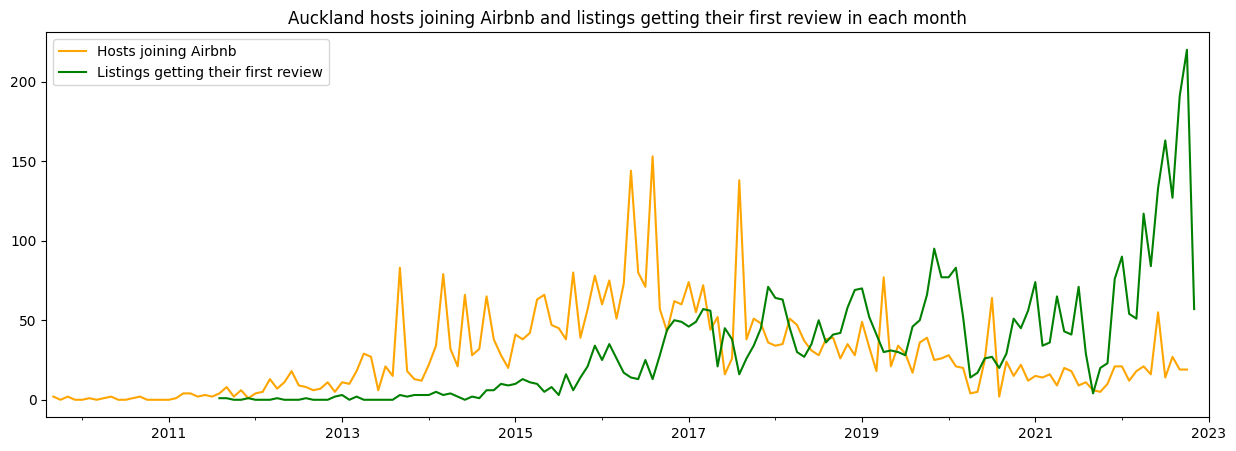

In [47]:
plt.figure(figsize=(15,5))
data.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
data.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Auckland hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2009-08-01', '2023-01-31') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()



Graph is showing a large number of hosts joining Airbnb at the end of 2013, throughout 2014, 2016, mid 2017. Number of reviews has an overall upwards tendency with a big drop in 2020 and before 2022 - impact of Covid restrictions. As of 2022, the number of reviews is constantly growing. 

Code downloaded and adapted from https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb

# Property data

In [48]:
data['id'].nunique()

4544

In [49]:
data['scrape_id'].nunique()

1

Each listing is unique and they were all scraped on the same date. 

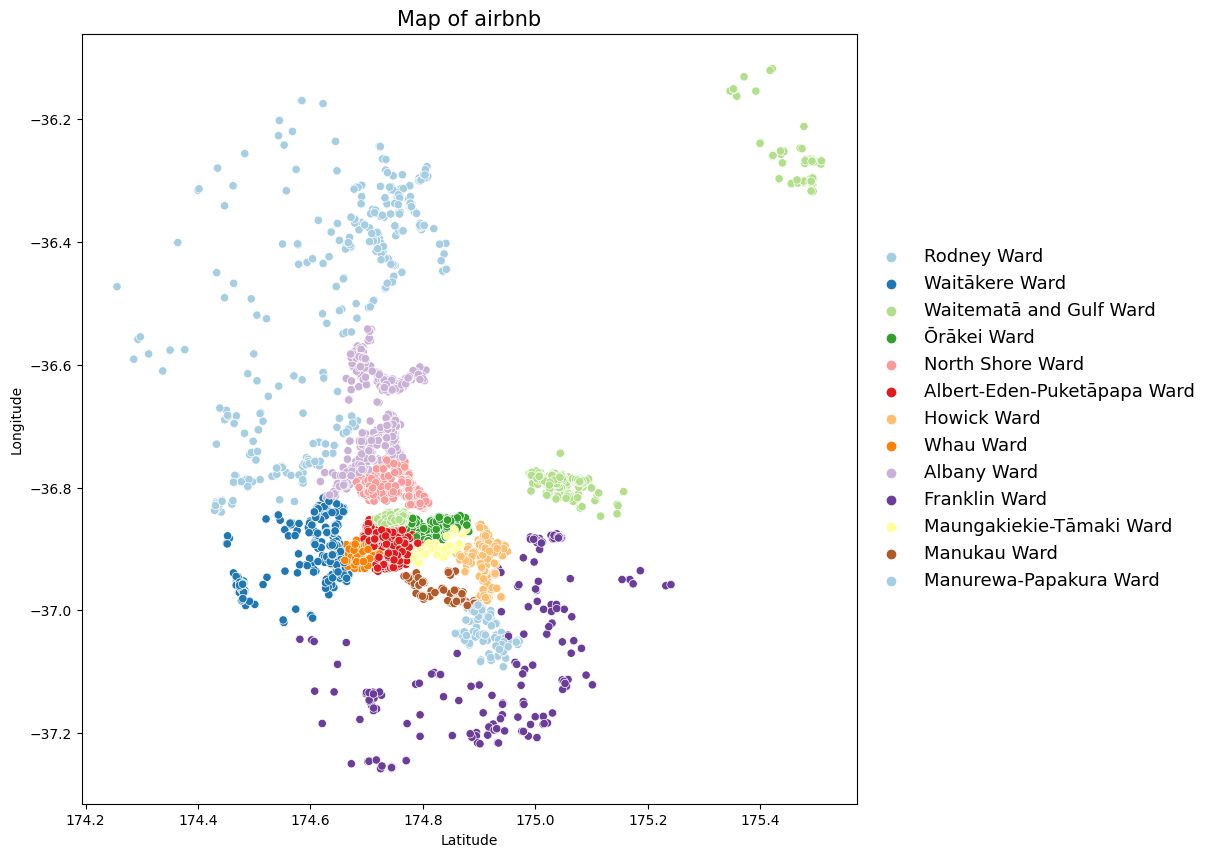

In [50]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='region_name', palette='Paired')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5));

Scatter plot of listings on map with their longitude and latitude. Region name is used as colour. Regions are the same as Auckland Council Wards. 

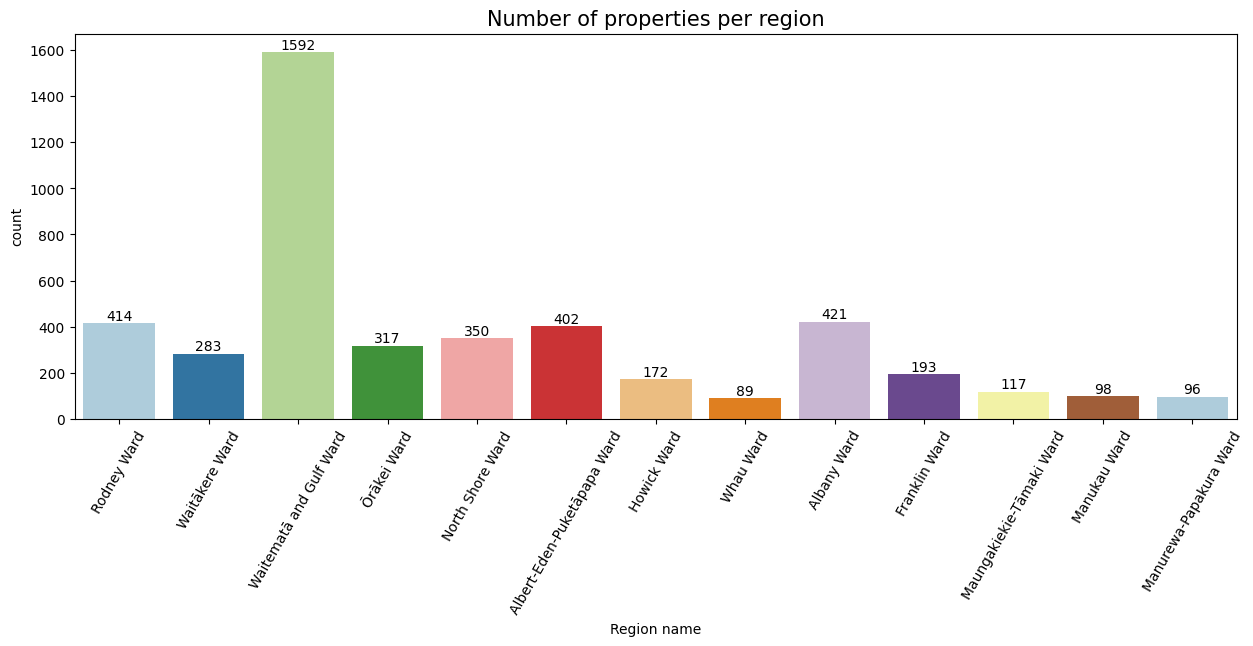

In [51]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='region_name', data=data, palette='Paired')
plt.title('Number of properties per region', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Region name')
plt.xticks(rotation=60);

In [52]:
data.region_name.value_counts()

Waitematā and Gulf Ward        1592
Albany Ward                     421
Rodney Ward                     414
Albert-Eden-Puketāpapa Ward     402
North Shore Ward                350
Ōrākei Ward                     317
Waitākere Ward                  283
Franklin Ward                   193
Howick Ward                     172
Maungakiekie-Tāmaki Ward        117
Manukau Ward                     98
Manurewa-Papakura Ward           96
Whau Ward                        89
Name: region_name, dtype: int64

Most properties are in Waitematā and Gulf Ward which covers: Westmere, Grey Lynn, Herne Bay, Ponsonby, Arch Hill, St Marys Bay, Freemans Bay, Newton, Eden Terrace, City Centre, Grafton, Newmarket and Parnell, parts of the Waiheke and Aotea Great Barrier Local Board areas.  It is followed by Albany Ward, Rodney Ward, Albert-Eden-Puketāpapa Ward and North Shore Ward. Wards at bottom cover east and south suburbs and area of New Lynn.

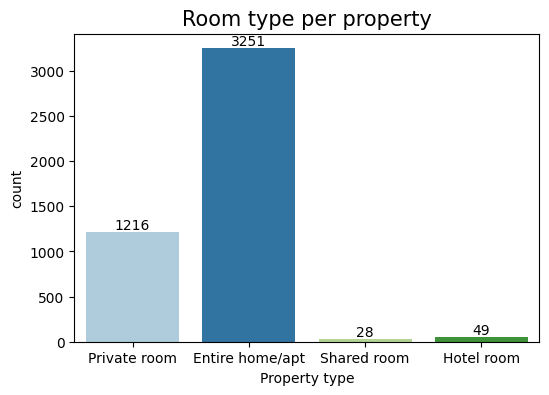

In [53]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='room_type', data=data, palette='Paired')
plt.title('Room type per property', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Property type');

Most common room type is entire home/apartment. In treemap below further categories are described. 

In [54]:
fig = px.treemap(data, path=['room_type', 'property_type']) 
fig.write_html(r"/Users/martahuhoja/Documents/IOD/Capstone/Airbnb/treemap.html")
fig.show()

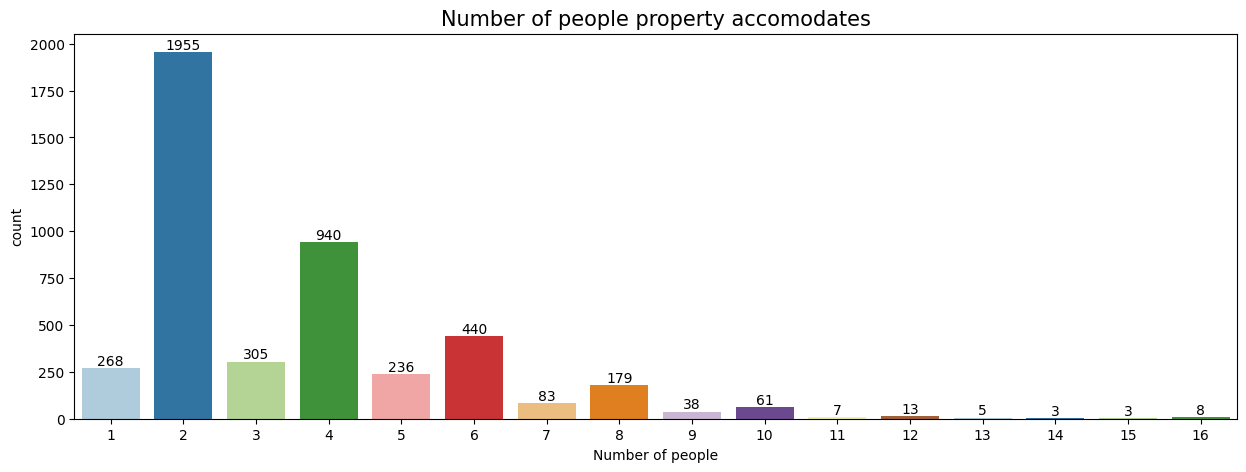

In [55]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='accommodates', data=data, palette='Paired')
plt.title('Number of people property accomodates', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Number of people');


Most properties accommodate 2 people (1955) and behind that is 4 (people). Biggest number of people per one listing is 18.

In [56]:
data.accommodates.value_counts()

2     1955
4      940
6      440
3      305
1      268
5      236
8      179
7       83
10      61
9       38
12      13
16       8
11       7
13       5
14       3
15       3
Name: accommodates, dtype: int64

In [57]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='beds', data=data, palette='Paired')
plt.title('Number of beds per property', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Number of beds');


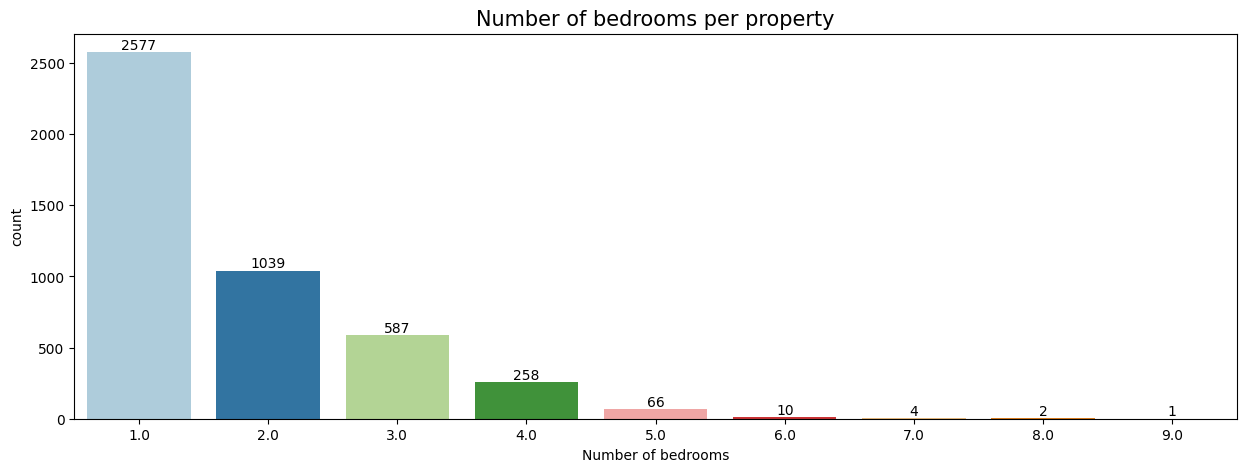

In [58]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='bedrooms', data=data, palette='Paired')
plt.title('Number of bedrooms per property', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Number of bedrooms');

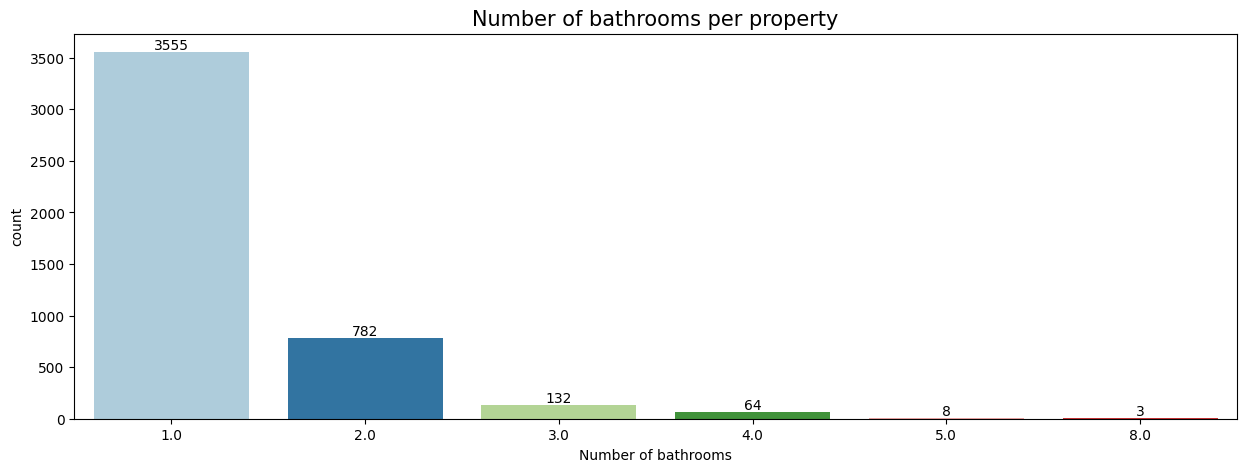

In [59]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='bathrooms_text', data=data, palette='Paired')
plt.title('Number of bathrooms per property', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Number of bathrooms');

Most properties have one bedroom, bed and bathroom. They are distributed with right skewness. 

In [83]:
reviews = data[['review_scores_rating', 
            'review_scores_accuracy',
            'review_scores_cleanliness',                       
            'review_scores_checkin',                       
            'review_scores_communication',                 
            'review_scores_location',
            'review_scores_value']]

plt.figure(figsize=(15,5))
ax = sns.boxplot( data=reviews, palette='Paired')
plt.title('Reviews distribution', fontsize=15)
plt.xticks (rotation =15);



All reviews have overall very high median, most of them around 4.8. However, there are many outliers and scores go as low as 1. 

In [80]:
plt.figure(figsize=(15,5))
ax = sns.boxenplot( data=data,x='price', palette='Paired')
plt.title('Price distribution', fontsize=15);


As a target variable, price is split into  categories:

- 0 - very low (< 80)
- 1 - low (80 <= value < 150)
- 2 - average (150 <= value < 320)
- 3 - high (320 <= value < 600)
- 4 - very high (>= 600)

In [63]:
def price_category(value):
    if value < 80:
        return "0"
    if 80 <= value < 150:
        return "1"
    elif 150 <= value < 320:
        return "2"
    elif 320 <= value < 600:
        return "3"
    elif value >= 600:
        return "4"

data['price_category'] = data['price'].map(price_category)
display(data.head())


id                          listing_url       scrape_id last_scraped  \
18  119431  https://www.airbnb.com/rooms/119431  20221108182706   2022-11-09   
27  154119  https://www.airbnb.com/rooms/154119  20221108182706   2022-11-09   
28  154130  https://www.airbnb.com/rooms/154130  20221108182706   2022-11-09   
33  216802  https://www.airbnb.com/rooms/216802  20221108182706   2022-11-09   
34  216846  https://www.airbnb.com/rooms/216846  20221108182706   2022-11-09   

                                  name  host_id  \
18     A place in the Country for YOU!   603014   
27      Room in a Home, Away from Home   741305   
28  Waterfront Paradise, Awesome Views   543866   
33     Haven In The City - Double Room  1119253   
34               Haven in The City  #1  1119253   

                                     host_url        host_name host_since  \
18   https://www.airbnb.com/users/show/603014             Mark 2011-05-19   
27   https://www.airbnb.com/users/show/741305           Sunder 2011-06-25   
28   https://www.airbnb.com/users/show/543866  Gerry Jeannette 2011-04-29   
33  https://www.airbnb.com/users/show/1119253             Judy 2011-09-06   
34  https://www.airbnb.com/users/show/1119253             Judy 2011-09-06   

             host_location  host_response_time  host_response_rate  \
18  Wellsford, New Zealand      within an hour                90.0   
27   Auckland, New Zealand        within a day               100.0   
28   Auckland, New Zealand      within an hour               100.0   
33   Auckland, New Zealand  within a few hours               100.0   
34   Auckland, New Zealand  within a few hours               100.0   

    host_acceptance_rate  host_is_superhost  host_listings_count  \
18                  83.0                  0                    1   
27                  75.0                  0                    1   
28                  95.0                  1                    1   
33                  85.0                  0                    4   
34                  85.0                  0                    4   

    host_verifications  host_has_profile_pic  host_identity_verified  \
18  ['email', 'phone']                     1                       1   
27  ['email', 'phone']                     1                       0   
28  ['email', 'phone']                     1                       1   
33  ['email', 'phone']                     1                       1   
34  ['email', 'phone']                     1                       1   

                                neighbourhood  latitude  longitude  \
18           Wellsford, Auckland, New Zealand -36.30842  174.46242   
27  Te Atatu Peninsula, Auckland, New Zealand -36.83699  174.65858   
28                      Auckland, New Zealand -36.83303  174.65911   
33                                   Auckland -36.85284  174.71878   
34                                   Auckland -36.85491  174.71962   

                        property_type     room_type  accommodates  \
18               Private room in home  Private room             8   
27               Private room in home  Private room             2   
28  Private room in bed and breakfast  Private room             4   
33               Private room in home  Private room             2   
34               Private room in home  Private room             1   

    bathrooms_text  bedrooms  beds  \
18             1.0       3.0   6.0   
27             1.0       1.0   2.0   
28             1.0       2.0   2.0   
33             1.0       1.0   1.0   
34             1.0       1.0   1.0   

                                            amenities  price  minimum_nights  \
18  ["Blender", "Conditioner", "Children\u2019s bo...  118.0               1   
27  ["Heating", "Free street parking", "High chair...   60.0               3   
28  ["Heating", "Children\u2019s books and toys", ...  124.0               2   
33  ["Hot water", "BBQ grill", "Indoor fireplace",...   90.0               2   
34  ["Kitchen", "Indoor firep

In [64]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='price_category', data=data, palette='Paired')
plt.title('Price category', fontsize=15)
ax.bar_label(ax.containers[0])
plt.xlabel('Price category');

In [65]:
plt.figure(figsize=(12,6))
ax = sns.violinplot(x='region_name', y='price', data=data, palette='Paired')
plt.title('Price per region', fontsize=15)
plt.xlabel('Region name')
plt.xticks (rotation =45)
plt.ylabel ('Price');



/var/folders/xk/hxj8h6056qx_kw4p64k25rzr0000gn/T/ipykernel_37152/1776611530.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



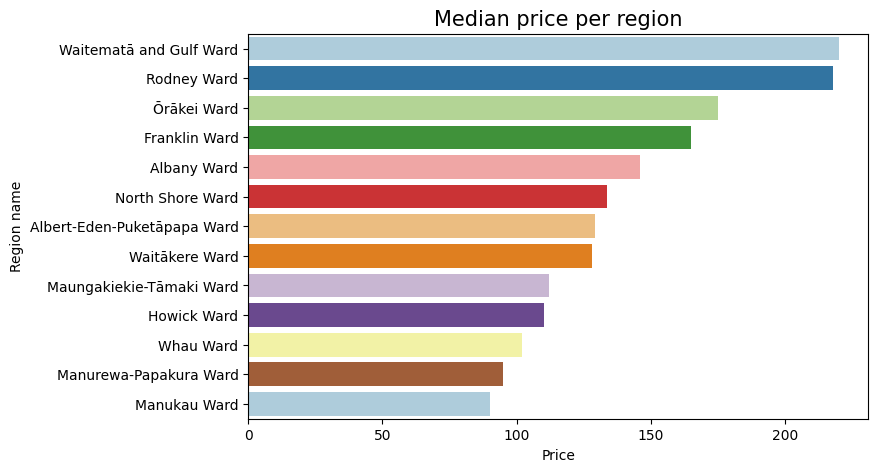

In [66]:
# group the dataframe by region and calculate the mean price
df_region = data.groupby('region_name').median()

# sort the regions by mean price
df_region = df_region.sort_values(by='price', ascending=False)

# plot the sorted data


plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_region, x='price', y=df_region.index, palette='Paired')
plt.title('Median price per region', fontsize=15)
plt.xlabel('Price')
plt.ylabel ('Region name');
plt.show()

Median price per region is highest in Waitematā and Gulf Ward which is not surprising based on the area it covers. Closely following is Rodney Ward - that is a region that has a very big spread and covers all different types of areas, beaches on both coasts and farm properties.  Bit of a surprise is Franklin Ward that only has 193 properties and is covering the south area of Auckland but is also spread across both coasts and covers farm properties.

### Map of all properties

In [68]:
#interactive map of all the properties

plot = px.scatter_geo(data, #specifying dataset
                      lat = 'latitude', lon = 'longitude', #specifying lon and lat - location
                      color='region_name', #setting color to show room type
                      size='price', #size of the dot is showing price
                      hover_data=['name',
                                  'price',
                                  'property_type',
                                  'room_type', 
                                  'bedrooms', 
                                  'bathrooms_text', 
                                  'has_availability', 
                                  'accommodates', 
                                  'number_of_reviews', 
                                  'review_scores_rating'],
                      #values that are showe when hovering the map
                      title = 'Map of all the properties') #setting map title
plot.show()

## Text data

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import sent_tokenize
import spacy
nlp = spacy.load('en_core_web_md')
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter

In [70]:
%%time
data['amenities_clean'] = data['amenities'].apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if (not token.is_stop and not token.is_punct)))

CPU times: user 2min 1s, sys: 1.22 s, total: 2min 3s
Wall time: 2min 3s


In [71]:
data['amenities_clean']

18       Blender conditioner children\u2019s book toy 7...
27       heating free street parking high chair private...
28       heating children\u2019s book toy high chair ha...
33       hot water bbq grill indoor fireplace heating B...
34       Kitchen indoor fireplace heating Backyard long...
                               ...                        
39705    Paid street parking premise private entrance l...
39719    Beach view aid kit Bay view Kitchen bbq grill ...
39746    Lockbox Kitchen heating Smoke alarm long term ...
39796    Kitchen bbq grill long term stay allow Smoke a...
39836    private living room conditioner children\u2019...
Name: amenities_clean, Length: 4544, dtype: object

In [72]:
tokens = [nltk.word_tokenize(text) for text in data['amenities_clean']]
tokens = [token for sublist in tokens for token in sublist]

counter = Counter(tokens)
mostCommon = counter.most_common(10)
mostCommon

words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
    
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

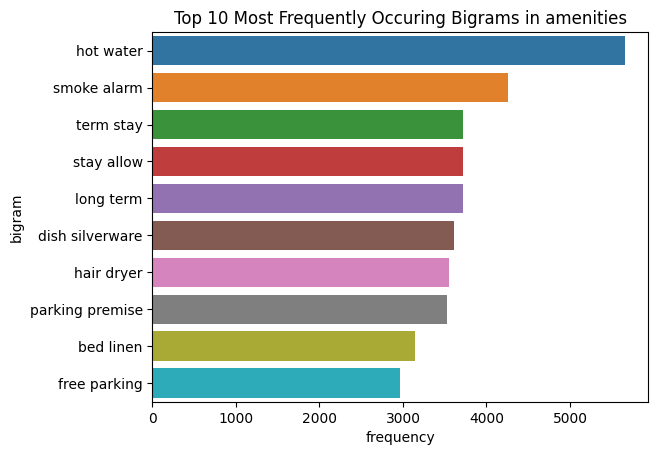

In [73]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['amenities_clean'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ['frequency', 'bigram']

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams in amenities')
plt.show()

Most frequent word is free and the most frequent bigram is hot water. Amenities are used in feature engineering.

In [79]:
#saving data to a file airbnb_data

data.to_csv('airbnb_data.csv', index=False)